<a href="https://colab.research.google.com/github/shadab4150/Planet-from-space/blob/master/planet_from_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision import *

In [2]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [3]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim = ' ', ds_tfms=planet_tfms)

In [5]:
planet.ls()

[PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(planet_tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use th

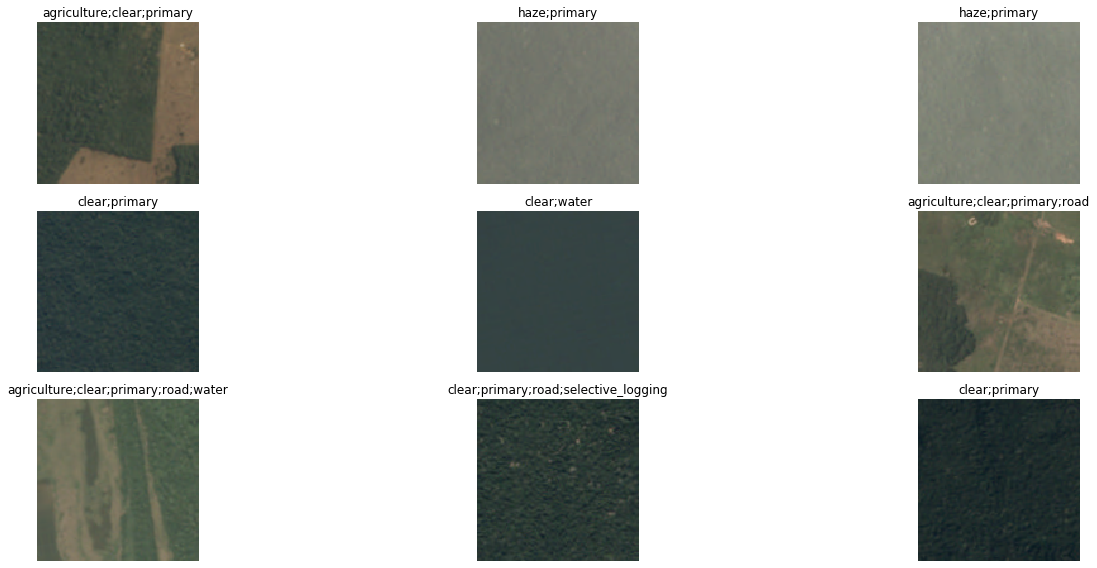

In [15]:
data.show_batch(rows=3, figsize=(20,8))

In [0]:
arch = models.resnet50

In [10]:

acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 50.0MB/s]


In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


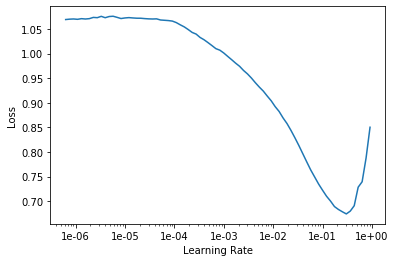

In [12]:
learn.recorder.plot(suggestions=True)

In [0]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.995380,1.312289,0.241071,0.538571,00:25
1,0.986174,1.116581,0.383929,0.475013,00:25
2,0.931119,1.449641,0.385714,0.404050,00:25
3,0.871237,1.243841,0.366071,0.382512,00:25
4,0.823178,1.115951,0.360714,0.396680,00:25


In [0]:
learn.save('stage-1-rn50')

In [17]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.648495,1.028952,0.355357,0.395146,00:25
1,0.618538,0.903421,0.435714,0.408018,00:26
2,0.584392,0.873325,0.496429,0.391659,00:26
3,0.546480,0.795413,0.594643,0.436435,00:26
4,0.516574,0.715159,0.646429,0.422827,00:26
5,0.485398,0.624171,0.682143,0.470506,00:26
6,0.457044,0.563264,0.726786,0.563674,00:26
7,0.434823,0.500770,0.742857,0.631304,00:25


In [19]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.272769,0.447450,0.762500,0.699438,00:25
1,0.267127,0.401457,0.794643,0.738397,00:25
2,0.255744,0.366887,0.842857,0.780999,00:25
3,0.229618,0.335686,0.866071,0.797317,00:25
4,0.217018,0.310388,0.882143,0.816577,00:25
5,0.201368,0.305190,0.885714,0.799984,00:25
6,0.191070,0.305872,0.894643,0.806682,00:25
7,0.182001,0.295722,0.898214,0.821535,00:25


In [0]:
learn.save('stage-1-rn50-12')
learn.export()

In [23]:
planet.ls()

[PosixPath('/root/.fastai/data/planet_tiny/models'),
 PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/export.pkl'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


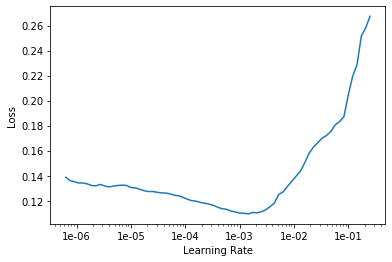

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.134908,0.287735,0.907143,0.833221,00:32
1,0.130119,0.295513,0.907143,0.840204,00:31
2,0.128402,0.290629,0.900000,0.808275,00:31
3,0.122758,0.298241,0.898214,0.810473,00:31
4,0.120977,0.293578,0.894643,0.793853,00:31


In [29]:
learn.fit_one_cycle(8, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099505,0.290723,0.894643,0.795878,00:32
1,0.105903,0.298881,0.878571,0.796078,00:31
2,0.102976,0.288459,0.873214,0.808824,00:31
3,0.100755,0.279759,0.883929,0.819594,00:31
4,0.098993,0.276191,0.891071,0.826268,00:31
5,0.094509,0.268524,0.903571,0.839078,00:31
6,0.092111,0.263399,0.912500,0.831622,00:31
7,0.090568,0.257523,0.917857,0.839300,00:31


In [0]:
learn.save('stage-1-rn50-123')

In [0]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.072446,0.252681,0.910714,0.822186,00:32
1,0.067839,0.249970,0.908929,0.821726,00:31
2,0.068831,0.243572,0.910714,0.823154,00:32
3,0.068249,0.241973,0.912500,0.812676,00:31
4,0.068363,0.238317,0.912500,0.812676,00:32
5,0.067964,0.235806,0.908929,0.811564,00:31
6,0.067113,0.237319,0.908929,0.811104,00:32
7,0.065843,0.238667,0.908929,0.816368,00:31


In [34]:
df=pd.read_csv(planet/"labels.csv")
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
class_type=data.classes

In [45]:
class_type

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'clear',
 'cloudy',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'water']